In [170]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
from itertools import cycle, islice

In [171]:
acrash= "Data/Crash_Data.csv"
acrash_df=pd.read_csv(acrash,dtype='unicode')
acrash_df

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,NaN,NaN,...,38,Inner Regional Australia,Melbourne - Outer East,Yarra Ranges (S),Arterial Road,No,No,26_to_39,Weekend,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,No,No,No,...,28,Major Cities of Australia,Adelaide - North,Playford (C),NaN,No,No,26_to_39,Weekend,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,NaN,NaN,...,19,Inner Regional Australia,Hume,Wangaratta (RC),Access road,No,No,17_to_25,Weekend,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,NaN,NaN,...,23,Outer Regional Australia,Hume,Wangaratta (RC),Arterial Road,No,No,17_to_25,Weekend,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,NaN,NaN,...,46,Major Cities of Australia,Melbourne - South East,Casey (C),Local Road,No,No,40_to_64,Weekend,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52838,19891246,NSW,1,1989,Wednesday,17:05,Single,Yes,NaN,No,...,5,NaN,NaN,NaN,NaN,No,No,0_to_16,Weekday,Day
52839,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,19,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52840,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day
52841,19895088,WA,1,1989,Monday,6:00,Single,No,NaN,No,...,17,NaN,NaN,NaN,NaN,Yes,No,17_to_25,Weekday,Day


In [172]:
acrash_new=acrash_df[['Crash ID','State', 'Month', 'Year', 'Dayweek', 'Time', 'Crash Type', 'Speed Limit','Road User','Gender','Age','National Remoteness Areas','Age Group','Time of day']]
acrash_new.head()

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
0,20212133,Vic,9,2021,Sunday,0:30,Single,NaN,Motorcycle rider,Male,38,Inner Regional Australia,26_to_39,Night
1,20214022,SA,9,2021,Saturday,23:31,Multiple,110,Pedestrian,Female,28,Major Cities of Australia,26_to_39,Night
2,20212096,Vic,9,2021,Saturday,23:00,Single,NaN,Passenger,Male,19,Inner Regional Australia,17_to_25,Night
3,20212145,Vic,9,2021,Saturday,22:25,Single,NaN,Driver,Male,23,Outer Regional Australia,17_to_25,Night
4,20212075,Vic,9,2021,Saturday,5:15,Single,NaN,Motorcycle rider,Male,46,Major Cities of Australia,40_to_64,Night


In [173]:
acrash_new_df = acrash_new.dropna(subset=['Speed Limit','National Remoteness Areas','Gender','Age Group'])

In [174]:
other_rows = acrash_new_df.loc[(acrash_new_df["Road User"] == "Other/-9"), :]
other_rows

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
350,20217005,NT,6,2021,Thursday,22:45,Single,110,Other/-9,Male,54,Very Remote Australia,40_to_64,Night
351,20217005,NT,6,2021,Thursday,22:45,Single,110,Other/-9,Female,48,Very Remote Australia,40_to_64,Night
949,20202152,Vic,11,2020,Wednesday,23:30,Single,50,Other/-9,Male,34,Major Cities of Australia,26_to_39,Night
1213,20202169,Vic,9,2020,Tuesday,17:00,Single,60,Other/-9,Female,20,Major Cities of Australia,17_to_25,Day
1402,20207009,NT,7,2020,Thursday,20:08,Single,100,Other/-9,Male,68,Very Remote Australia,65_to_74,Night
1702,20202195,Vic,3,2020,Monday,6:40,Multiple,80,Other/-9,Male,31,Inner Regional Australia,26_to_39,Day
2561,20193108,Qld,6,2019,Friday,14:00,Single,70,Other/-9,Female,50,Inner Regional Australia,40_to_64,Day
2615,20192110,Vic,5,2019,Saturday,0:15,Multiple,100,Other/-9,Male,19,Inner Regional Australia,17_to_25,Night
3356,20182186,Vic,10,2018,Friday,17:45,Single,60,Other/-9,Female,86,Major Cities of Australia,75_or_older,Day
3539,20187019,NT,8,2018,Sunday,17:00,Single,110,Other/-9,Female,59,Very Remote Australia,40_to_64,Day


In [175]:
acrash_new_df = acrash_new_df[acrash_new_df['Road User'] != 'Other/-9']
acrash_new_df = acrash_new_df[acrash_new_df['Speed Limit'] != 'Unspecified']

In [176]:
acrash_new_df['Speed Limit']=acrash_new_df['Speed Limit'].replace(['<40'],'40')

In [177]:
acrash_new_df.reset_index(drop=True)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Speed Limit,Road User,Gender,Age,National Remoteness Areas,Age Group,Time of day
0,20214022,SA,9,2021,Saturday,23:31,Multiple,110,Pedestrian,Female,28,Major Cities of Australia,26_to_39,Night
1,20213034,Qld,9,2021,Saturday,4:00,Multiple,100,Motorcycle rider,Male,19,Major Cities of Australia,17_to_25,Night
2,20213092,Qld,9,2021,Saturday,2:00,Single,60,Driver,Male,47,Major Cities of Australia,40_to_64,Night
3,20214053,SA,9,2021,Thursday,21:00,Single,80,Driver,Male,24,Inner Regional Australia,17_to_25,Night
4,20213178,Qld,9,2021,Sunday,21:00,Multiple,50,Motorcycle rider,Male,52,Major Cities of Australia,40_to_64,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6761,20144083,SA,1,2014,Friday,11:10,Multiple,110,Passenger,Male,40,Outer Regional Australia,40_to_64,Day
6762,20145108,WA,1,2014,Wednesday,11:47,Single,100,Motorcycle rider,Male,46,Major Cities of Australia,40_to_64,Day
6763,20144022,SA,1,2014,Monday,9:35,Single,50,Pedestrian,Female,82,Major Cities of Australia,75_or_older,Day
6764,20145072,WA,1,2014,Tuesday,21:30,Single,110,Driver,Male,84,Remote Australia,75_or_older,Night


In [178]:
acrash_new_df.to_csv("Data/cleaned_crash_data.csv", 
                    encoding="utf-8" , index=False, header=True)

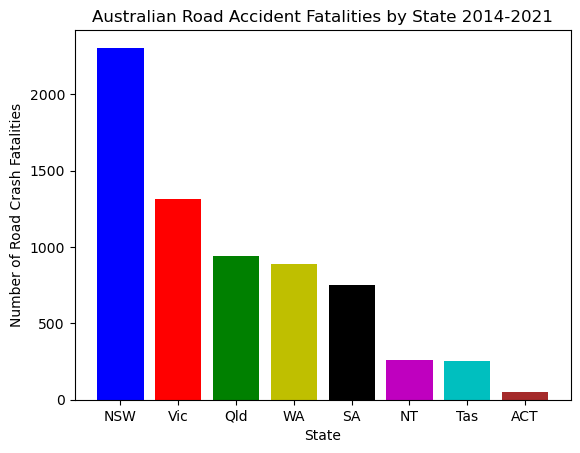

In [195]:
state_count=acrash_new_df['State'].value_counts()
x_axis=state_count.index.values
y_axis=state_count.values

my_colors_state = list(islice(cycle(['b', 'r', 'g', 'y', 'k','m','c','brown']), None, len(acrash_new_df['State'])))

plt.bar(x_axis,y_axis,align='center', color = my_colors_state)
plt.xlabel('State')
plt.ylabel('Number of Road Crash Fatalities')
plt.title('Australian Road Accident Fatalities by State 2014-2021')
plt.savefig('Data/Images/State_Crash.png')
plt.show()

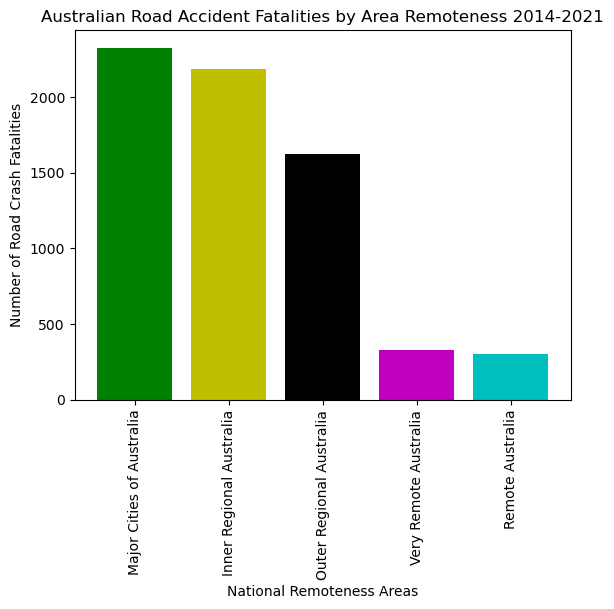

In [196]:
remote_count=acrash_new_df['National Remoteness Areas'].value_counts()
x_axis=remote_count.index.values
y_axis=remote_count.values

my_colors_remote_area = list(islice(cycle([ 'g', 'y', 'k','m','c']), None, len(acrash_new_df['National Remoteness Areas'])))

plt.bar(x_axis,y_axis,align='center',color = my_colors_remote_area)
plt.xlabel('National Remoteness Areas')
plt.ylabel('Number of Road Crash Fatalities')
plt.title('Australian Road Accident Fatalities by Area Remoteness 2014-2021')
plt.xticks(rotation="vertical")
plt.savefig('Data/Images/Remote_area_numbers.png')
plt.show()

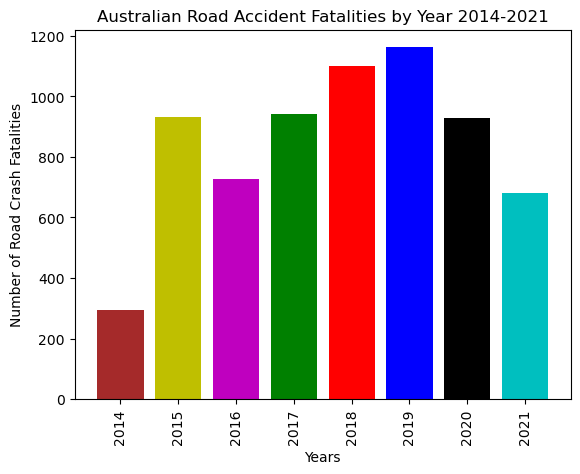

In [197]:
acrash_new_df['Year']=acrash_new_df['Year'].astype(int)
remote_count=acrash_new_df['Year'].value_counts()
x_axis=remote_count.index.values
y_axis=remote_count.values

my_colors_year = list(islice(cycle(['b', 'r', 'g', 'y', 'k','m','c','brown']), None, len(acrash_new_df['State'])))

plt.bar(x_axis,y_axis, align='center',color=my_colors_year)
plt.xlabel('Years')
plt.ylabel('# of crash')
plt.ylabel('Number of Road Crash Fatalities')
plt.title('Australian Road Accident Fatalities by Year 2014-2021')
plt.xticks(rotation="vertical")
plt.savefig('Data/Images/Number of crash in Year .png')
plt.show()

In [132]:
speed_agg=acrash_new_df.groupby(['State'])[['Speed Limit']].agg(['mean', 'median', 'var', 'std', 'sem'])
speed_agg

Speed Limit                                        
             mean median         var        std       sem
State                                                    
ACT     75.294118   80.0  285.411765  16.894134  2.365652
NSW     80.021683   80.0  467.808640  21.628884  0.450406
NT      95.369650  100.0  644.491732  25.386842  1.583588
Qld     83.148936   90.0  373.886208  19.336137  0.630675
SA      85.046481  100.0  583.475230  24.155232  0.880266
Tas     84.055118  100.0  510.368491  22.591337  1.417507
Vic     81.373668   80.0  406.432238  20.160165  0.556156
WA      88.035915  100.0  527.935787  22.976853  0.769754

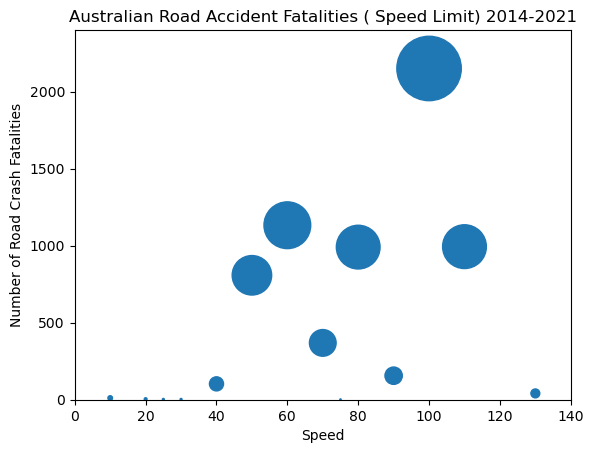

In [198]:
acrash_new_df['Speed Limit']=acrash_new_df['Speed Limit'].astype(int)
speed_limit=acrash_new_df['Speed Limit'].value_counts()
speed=speed_limit.index.values
count=speed_limit.values

plt.scatter(speed,count,marker='o',s=count)

plt.xlabel('Speed')
plt.ylabel('Number of Road Crash Fatalities')
plt.title('Australian Road Accident Fatalities ( Speed Limit) 2014-2021')
plt.xlim(0,140)
plt.ylim(0,2400)
plt.savefig('Data/Images/Speed v Crash.png')
plt.show()

In [ ]:
correlation=st.pearsonr(speed,count)
print(f" The correlation between speed and number of crash is {round(correlation[0],2)}")

The r-squared is: 0.186


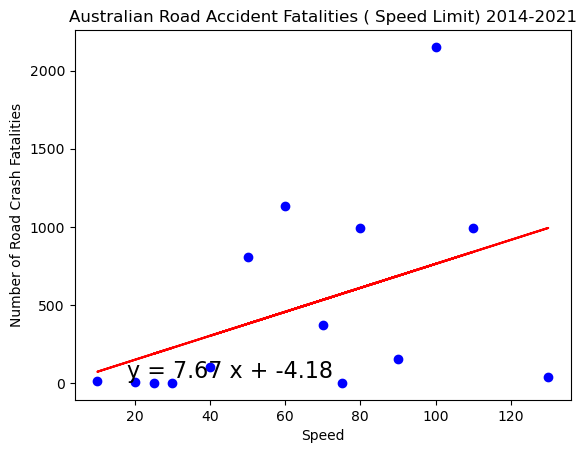

In [200]:
(slope, intercept,rvalue, pvalue, stderr)= linregress(speed,count)
regress_values=speed* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(speed,count,color='b')
plt.plot(speed, regress_values, color='red')
plt.annotate(line_eq, (18,37), fontsize=16)
plt.xlabel("Speed")
plt.ylabel('Number of Road Crash Fatalities')
plt.title('Australian Road Accident Fatalities ( Speed Limit) 2014-2021')
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.savefig('Data/Images/Speed v # of Crash 2.png')
plt.show()